In [1]:
%pylab inline

import numpy as np
import torch

from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch import optim
from torch import nn
from torchvision.datasets import CIFAR10
from torchvision import transforms
from densenet import DenseNet

from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


# Configuration

In [2]:
EPOCH = 3000
BATCH_SIZE = 32
PRINT_TRAINING_INTERVAL = 1000
CUDA = True

# Data

In [3]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])


to_pil = transforms.ToPILImage()


trainset = CIFAR10('./CIFAR10', train=True,  transform=transform, download=True)
testset  = CIFAR10('./CIFAR10', train=False, transform=transform, download=True)

train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
test_loader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)


train_x = trainset.train_data
train_y = np.array(trainset.train_labels)
test_x = testset.test_data
test_y = np.array(testset.test_labels)

print('train_x:', train_x.shape)
print('train_y:', train_y.shape)
print('test_x:', test_x.shape)
print('test_y:', test_y.shape)

Files already downloaded and verified
Files already downloaded and verified
train_x: (50000, 32, 32, 3)
train_y: (50000,)
test_x: (10000, 32, 32, 3)
test_y: (10000,)


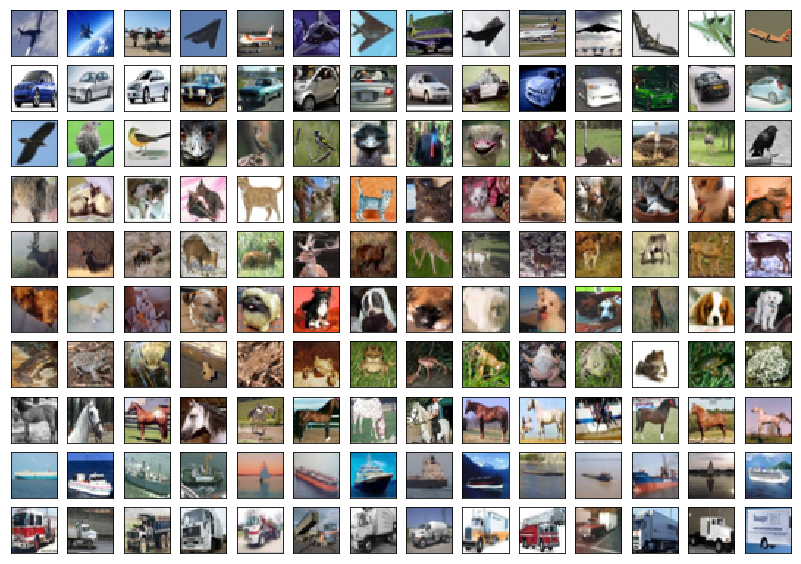

In [4]:
def show_samples(x, y):
    # Convert Tensor to Numpy Array
    if isinstance(x, torch.Tensor):
        x = x.cpu().numpy().transpose(0, 2, 3, 1)
        x = (x - x.min()) / (x.max() - x.min())
        x = 1 - x
        x *= 255
        
        x = x.astype('int').astype('float32')
        y = y.cpu().numpy()
    
    x, y = np.array(x), np.array(y)
    labels = np.unique(y)
    
    fig, subplots = pylab.subplots(len(labels), 14, figsize=(14, 10)) # subplots(y축, x축 갯수)
    subplots = subplots.T.reshape(-1)

    for i, p in enumerate(subplots):
        target = x[y == labels[i%len(labels)]]

        idx = np.random.randint(target.shape[0])
        d = target[idx]
        p.get_xaxis().set_visible(False)
        p.get_yaxis().set_visible(False)
        p.imshow(d)
        
show_samples(test_loader.dataset.test_data, test_loader.dataset.test_labels)

# Model

In [ ]:
model = DenseNet(24, 0.5, n_class=10, fc_size=16320, blocks=[24, 24, 24])
model.cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Train

In [ ]:
logs = {'loss': list(), 'duration': list()}
step = 0

for epoch in range(0, EPOCH):
    for x_sample, y_sample in train_loader:
        start_t = datetime.now()
        x_sample, y_sample = Variable(x_sample).cuda(), Variable(y_sample).cuda()

        # Init Gradients
        optimizer.zero_grad()

        # Feedforward    
        y_pred = model(x_sample)
        loss = criterion(y_pred, y_sample)
        loss.backward()
        optimizer.step()

        # Add Step
        step += 1

        # Logging
        loss = loss.data.cpu().numpy()[0]
        duration = (datetime.now() - start_t).total_seconds()
        logs['loss'].append(loss)
        logs['duration'].append(duration)
        
        if step % PRINT_TRAINING_INTERVAL == 0:
            loss = np.mean(logs['loss'][-PRINT_TRAINING_INTERVAL:])
            duration = np.sum(logs['duration'][-PRINT_TRAINING_INTERVAL:])
            print(f'epoch:{epoch} | step:{step} | time:{duration:<4.2} | loss:{loss:<8.4}')

epoch:0 | step:1000 | time:3.6e+02 | loss:1.483   
epoch:1 | step:2000 | time:3.6e+02 | loss:0.9829  
epoch:1 | step:3000 | time:3.6e+02 | loss:0.8229  
epoch:2 | step:4000 | time:3.6e+02 | loss:0.7388  
epoch:3 | step:5000 | time:3.6e+02 | loss:0.6309  
epoch:3 | step:6000 | time:3.6e+02 | loss:0.5716  
epoch:4 | step:7000 | time:3.6e+02 | loss:0.5112  
epoch:5 | step:8000 | time:3.6e+02 | loss:0.4647  
epoch:5 | step:9000 | time:3.6e+02 | loss:0.4408  
epoch:6 | step:10000 | time:3.6e+02 | loss:0.381   
epoch:7 | step:11000 | time:3.6e+02 | loss:0.3678  
epoch:7 | step:12000 | time:3.6e+02 | loss:0.3222  
epoch:8 | step:13000 | time:3.6e+02 | loss:0.2915  
epoch:8 | step:14000 | time:3.6e+02 | loss:0.2867  
epoch:9 | step:15000 | time:3.6e+02 | loss:0.2437  
epoch:10 | step:16000 | time:3.6e+02 | loss:0.2282  
epoch:10 | step:17000 | time:3.6e+02 | loss:0.2148  
epoch:11 | step:18000 | time:3.6e+02 | loss:0.1854  
epoch:12 | step:19000 | time:3.6e+02 | loss:0.1798  
epoch:12 | step:2

epoch:99 | step:155000 | time:3.6e+02 | loss:0.01813 
epoch:99 | step:156000 | time:3.6e+02 | loss:0.02073 
epoch:100 | step:157000 | time:3.6e+02 | loss:0.0179  
epoch:101 | step:158000 | time:3.6e+02 | loss:0.0195  
epoch:101 | step:159000 | time:3.6e+02 | loss:0.02116 
epoch:102 | step:160000 | time:3.6e+02 | loss:0.01707 
epoch:103 | step:161000 | time:3.6e+02 | loss:0.01657 
epoch:103 | step:162000 | time:3.6e+02 | loss:0.01659 
epoch:104 | step:163000 | time:3.6e+02 | loss:0.01962 
epoch:104 | step:164000 | time:3.6e+02 | loss:0.01613 
epoch:105 | step:165000 | time:3.6e+02 | loss:0.01575 
epoch:106 | step:166000 | time:3.6e+02 | loss:0.01512 
epoch:106 | step:167000 | time:3.6e+02 | loss:0.02217 
epoch:107 | step:168000 | time:3.6e+02 | loss:0.01646 
epoch:108 | step:169000 | time:3.6e+02 | loss:0.01834 
epoch:108 | step:170000 | time:3.6e+02 | loss:0.01498 
epoch:109 | step:171000 | time:3.6e+02 | loss:0.01648 
epoch:110 | step:172000 | time:3.6e+02 | loss:0.01737 
epoch:110 | 

epoch:194 | step:304000 | time:3.5e+02 | loss:0.01131 
epoch:195 | step:305000 | time:3.5e+02 | loss:0.01352 
epoch:195 | step:306000 | time:3.5e+02 | loss:0.01341 
epoch:196 | step:307000 | time:3.5e+02 | loss:0.01529 
epoch:197 | step:308000 | time:3.5e+02 | loss:0.01326 
epoch:197 | step:309000 | time:3.5e+02 | loss:0.009932
epoch:198 | step:310000 | time:3.5e+02 | loss:0.01852 
epoch:198 | step:311000 | time:3.5e+02 | loss:0.01523 
epoch:199 | step:312000 | time:3.5e+02 | loss:0.01231 
epoch:200 | step:313000 | time:3.5e+02 | loss:0.01065 
epoch:200 | step:314000 | time:3.5e+02 | loss:0.01265 
epoch:201 | step:315000 | time:3.5e+02 | loss:0.009269
epoch:202 | step:316000 | time:3.5e+02 | loss:0.01562 
epoch:202 | step:317000 | time:3.5e+02 | loss:0.01348 
epoch:203 | step:318000 | time:3.5e+02 | loss:0.01374 
epoch:204 | step:319000 | time:3.5e+02 | loss:0.0155  
epoch:204 | step:320000 | time:3.5e+02 | loss:0.01298 
epoch:205 | step:321000 | time:3.5e+02 | loss:0.01018 
epoch:206 

epoch:289 | step:453000 | time:3.6e+02 | loss:0.01093 
epoch:290 | step:454000 | time:3.6e+02 | loss:0.01082 
epoch:291 | step:455000 | time:3.6e+02 | loss:0.01265 
epoch:291 | step:456000 | time:3.6e+02 | loss:0.01172 
epoch:292 | step:457000 | time:3.6e+02 | loss:0.01242 
epoch:293 | step:458000 | time:3.6e+02 | loss:0.009038
epoch:293 | step:459000 | time:3.6e+02 | loss:0.009956
epoch:294 | step:460000 | time:3.6e+02 | loss:0.005943
epoch:294 | step:461000 | time:3.6e+02 | loss:0.008024
epoch:295 | step:462000 | time:3.6e+02 | loss:0.01396 
epoch:296 | step:463000 | time:3.6e+02 | loss:0.009757
epoch:296 | step:464000 | time:3.6e+02 | loss:0.0113  
epoch:297 | step:465000 | time:3.6e+02 | loss:0.01031 
epoch:298 | step:466000 | time:3.6e+02 | loss:0.01175 
epoch:298 | step:467000 | time:3.6e+02 | loss:0.01185 
epoch:299 | step:468000 | time:3.6e+02 | loss:0.01143 
epoch:300 | step:469000 | time:3.6e+02 | loss:0.01501 
epoch:300 | step:470000 | time:3.6e+02 | loss:0.01006 
epoch:301 

epoch:385 | step:602000 | time:3.5e+02 | loss:0.01225 
epoch:385 | step:603000 | time:3.6e+02 | loss:0.009838
epoch:386 | step:604000 | time:3.5e+02 | loss:0.01014 
epoch:387 | step:605000 | time:3.5e+02 | loss:0.009115
epoch:387 | step:606000 | time:3.5e+02 | loss:0.01143 
epoch:388 | step:607000 | time:3.5e+02 | loss:0.01136 
epoch:388 | step:608000 | time:3.5e+02 | loss:0.01345 
epoch:389 | step:609000 | time:3.5e+02 | loss:0.009829
epoch:390 | step:610000 | time:3.5e+02 | loss:0.00792 
epoch:390 | step:611000 | time:3.5e+02 | loss:0.009315
epoch:391 | step:612000 | time:3.5e+02 | loss:0.005887
epoch:392 | step:613000 | time:3.5e+02 | loss:0.009905
epoch:392 | step:614000 | time:3.6e+02 | loss:0.01245 
epoch:393 | step:615000 | time:3.5e+02 | loss:0.01371 
epoch:394 | step:616000 | time:3.5e+02 | loss:0.01115 
epoch:394 | step:617000 | time:3.5e+02 | loss:0.00963 
epoch:395 | step:618000 | time:3.5e+02 | loss:0.01024 
epoch:396 | step:619000 | time:3.5e+02 | loss:0.01172 
epoch:396 

epoch:480 | step:751000 | time:3.6e+02 | loss:0.009997
epoch:481 | step:752000 | time:3.6e+02 | loss:0.01182 
epoch:481 | step:753000 | time:3.5e+02 | loss:0.01052 
epoch:482 | step:754000 | time:3.5e+02 | loss:0.007298
epoch:483 | step:755000 | time:3.5e+02 | loss:0.008373
epoch:483 | step:756000 | time:3.5e+02 | loss:0.008246
epoch:484 | step:757000 | time:3.5e+02 | loss:0.006095
epoch:484 | step:758000 | time:3.5e+02 | loss:0.0106  
epoch:485 | step:759000 | time:3.5e+02 | loss:0.01082 
epoch:486 | step:760000 | time:3.5e+02 | loss:0.013   
epoch:486 | step:761000 | time:3.5e+02 | loss:0.007351
epoch:487 | step:762000 | time:3.5e+02 | loss:0.006331
epoch:488 | step:763000 | time:3.5e+02 | loss:0.01086 
epoch:488 | step:764000 | time:3.5e+02 | loss:0.009466
epoch:489 | step:765000 | time:3.5e+02 | loss:0.0112  
epoch:490 | step:766000 | time:3.5e+02 | loss:0.01267 
epoch:490 | step:767000 | time:3.6e+02 | loss:0.005468
epoch:491 | step:768000 | time:3.6e+02 | loss:0.00714 
epoch:492 

epoch:575 | step:900000 | time:3.6e+02 | loss:0.01277 
epoch:576 | step:901000 | time:3.6e+02 | loss:0.006667
epoch:577 | step:902000 | time:3.6e+02 | loss:0.01101 
epoch:577 | step:903000 | time:3.6e+02 | loss:0.01233 
epoch:578 | step:904000 | time:3.6e+02 | loss:0.008076
epoch:579 | step:905000 | time:3.6e+02 | loss:0.01053 
epoch:579 | step:906000 | time:3.6e+02 | loss:0.005871
epoch:580 | step:907000 | time:3.6e+02 | loss:0.01359 
epoch:580 | step:908000 | time:3.6e+02 | loss:0.009799
epoch:581 | step:909000 | time:3.6e+02 | loss:0.01113 
epoch:582 | step:910000 | time:3.6e+02 | loss:0.007704
epoch:582 | step:911000 | time:3.6e+02 | loss:0.009392
epoch:583 | step:912000 | time:3.6e+02 | loss:0.01328 
epoch:584 | step:913000 | time:3.5e+02 | loss:0.007397
epoch:584 | step:914000 | time:3.5e+02 | loss:0.008544
epoch:585 | step:915000 | time:3.5e+02 | loss:0.01168 
epoch:586 | step:916000 | time:3.5e+02 | loss:0.01049 
epoch:586 | step:917000 | time:3.5e+02 | loss:0.01113 
epoch:587 

epoch:671 | step:1049000 | time:3.5e+02 | loss:0.01115 
epoch:671 | step:1050000 | time:3.5e+02 | loss:0.007904
epoch:672 | step:1051000 | time:3.5e+02 | loss:0.005934
epoch:673 | step:1052000 | time:3.5e+02 | loss:0.007554
epoch:673 | step:1053000 | time:3.5e+02 | loss:0.01155 
epoch:674 | step:1054000 | time:3.5e+02 | loss:0.01058 
epoch:674 | step:1055000 | time:3.5e+02 | loss:0.008956
epoch:675 | step:1056000 | time:3.5e+02 | loss:0.007032
epoch:676 | step:1057000 | time:3.5e+02 | loss:0.009967
epoch:676 | step:1058000 | time:3.5e+02 | loss:0.009003
epoch:677 | step:1059000 | time:3.5e+02 | loss:0.008655
epoch:678 | step:1060000 | time:3.5e+02 | loss:0.008848
epoch:678 | step:1061000 | time:3.5e+02 | loss:0.006887
epoch:679 | step:1062000 | time:3.5e+02 | loss:0.008162
epoch:680 | step:1063000 | time:3.5e+02 | loss:0.009122
epoch:680 | step:1064000 | time:3.5e+02 | loss:0.009783
epoch:681 | step:1065000 | time:3.5e+02 | loss:0.008452
epoch:682 | step:1066000 | time:3.5e+02 | loss:0

epoch:765 | step:1196000 | time:3.5e+02 | loss:0.006455
epoch:765 | step:1197000 | time:3.5e+02 | loss:0.008246
epoch:766 | step:1198000 | time:3.5e+02 | loss:0.006322
epoch:767 | step:1199000 | time:3.5e+02 | loss:0.01402 
epoch:767 | step:1200000 | time:3.5e+02 | loss:0.01076 
epoch:768 | step:1201000 | time:3.5e+02 | loss:0.008706
epoch:769 | step:1202000 | time:3.5e+02 | loss:0.005462
epoch:769 | step:1203000 | time:3.5e+02 | loss:0.00901 
epoch:770 | step:1204000 | time:3.5e+02 | loss:0.006261
epoch:770 | step:1205000 | time:3.6e+02 | loss:0.01027 
epoch:771 | step:1206000 | time:3.5e+02 | loss:0.009039
epoch:772 | step:1207000 | time:3.5e+02 | loss:0.01095 
epoch:772 | step:1208000 | time:3.5e+02 | loss:0.007507
epoch:773 | step:1209000 | time:3.5e+02 | loss:0.01009 
epoch:774 | step:1210000 | time:3.5e+02 | loss:0.006519
epoch:774 | step:1211000 | time:3.6e+02 | loss:0.006784
epoch:775 | step:1212000 | time:3.5e+02 | loss:0.005574
epoch:776 | step:1213000 | time:3.5e+02 | loss:0

epoch:859 | step:1343000 | time:3.5e+02 | loss:0.006435
epoch:859 | step:1344000 | time:3.5e+02 | loss:0.01081 
epoch:860 | step:1345000 | time:3.5e+02 | loss:0.01025 
epoch:861 | step:1346000 | time:3.5e+02 | loss:0.007208
epoch:861 | step:1347000 | time:3.5e+02 | loss:0.01019 
epoch:862 | step:1348000 | time:3.5e+02 | loss:0.01157 
epoch:863 | step:1349000 | time:3.5e+02 | loss:0.006951
epoch:863 | step:1350000 | time:3.5e+02 | loss:0.007862
epoch:864 | step:1351000 | time:3.5e+02 | loss:0.01043 
epoch:865 | step:1352000 | time:3.5e+02 | loss:0.00919 
epoch:865 | step:1353000 | time:3.5e+02 | loss:0.006855
epoch:866 | step:1354000 | time:3.5e+02 | loss:0.007494
epoch:866 | step:1355000 | time:3.5e+02 | loss:0.006268
epoch:867 | step:1356000 | time:3.5e+02 | loss:0.003841
epoch:868 | step:1357000 | time:3.5e+02 | loss:0.00768 
epoch:868 | step:1358000 | time:3.5e+02 | loss:0.01509 
epoch:869 | step:1359000 | time:3.5e+02 | loss:0.008609
epoch:870 | step:1360000 | time:3.5e+02 | loss:0

## Save Model

In [ ]:
checkpoint = {
    'model': model.state_dict(),
    'epoch': epoch,
    'logs':  logs
}
torch.save(checkpoint, 'model.pt')

## Evaluate

In [ ]:
start_t = datetime.now()
n_total_correct = 0
total_duration = 0
N = len(test_loader.dataset)

for i, (x_sample, y_true) in enumerate(test_loader):
    start_t = datetime.now()
    x_sample, y_true = Variable(x_sample).cuda(), Variable(y_true).cuda()
    
    y_pred = model(x_sample)
    _, y_pred = torch.max(y_pred.data, 1)
    n_correct = torch.sum(y_pred == y_true.data)
    n_total_correct += n_correct
    
    # Time
    duration = (datetime.now() - start_t).total_seconds()
    total_duration += duration

print(f'[{total_duration/N:<6.2}] accuracy:', n_total_correct/N)